
# Topic: Process Monitoring via DPCA using PDS_DPCA module

#### For illustration, we will use benchmark data from Tennessee Eastman process (TEP). The dataset for this process has been made available at https://github.com/camaramm/tennessee-eastman-profBraatz. 
##### This process consists of several unit operations: a reactor, a condenser, a separator, a stripper, and a recycle compressor. There are 22 continuous process measurements, 19 composition measurements, and 11 manipulated variables.

#### Details on the process and the PCA methodology is available in our book 'Machine Learning in Python for Process Systems Engineering' (https://leanpub.com/machineLearningPSE)

#### The dataset contains training and test data from normal operation period and 21 faulty periods with distinct fault causes. For each fault class, training dataset contains 480 samples collected over 24 operation hours and test dataset contains 960 samples collected over 48 operation hours. For the faulty data, faulty operation starts from sample 160 onwards. Our objective here is to build a fault detection tool that clearly indicates the onset of process fault. 


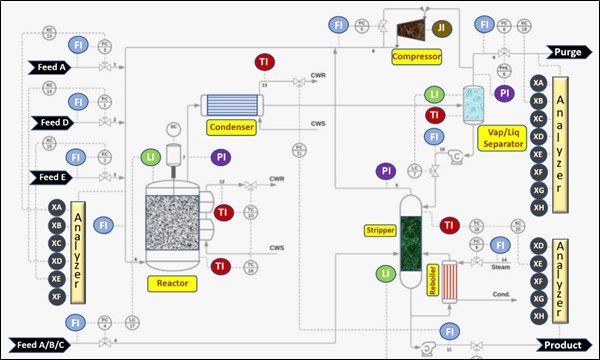

###### The above diagram adapted from the original flowsheet by Gilberto Xavier (https://github.com/gmxavier/TEP-meets-LSTM) provided under Creative-Commons Attribution 4.0 International License (https://creativecommons.org/licenses/by/4.0/).

In [1]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
from PDStoolkit import PDS_DPCA
from sklearn.preprocessing import StandardScaler

In [2]:
# read training and faulty/test data
trainingData = np.loadtxt('d00.dat').T  # Tennessee Eastman dataset
FaultyData =  np.loadtxt('d05_te.dat')

In [3]:
# select variables
Data_training = np.hstack((trainingData[:,0:22], trainingData[:,41:52]))
Data_faulty = np.hstack((FaultyData[:,0:22], FaultyData[:,41:52]))

In [4]:
# scale data
scaler = StandardScaler()
Data_training_scaled = scaler.fit_transform(Data_training)
Data_faulty_scaled = scaler.transform(Data_faulty)

In [5]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                          Train the monitoring model
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# of latents selected:  40


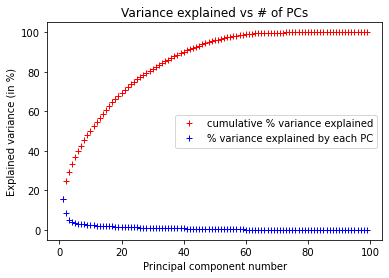

PDS_DPCA(n_lags=2)

In [6]:
# build PDS_DPCA model
dpca = PDS_DPCA(n_lags=2) # Number of lags taken from the work of Yin et al., https://doi.org/10.1016/j.jprocont.2012.06.009
dpca.fit(Data_training_scaled, autoFindNLatents=True)

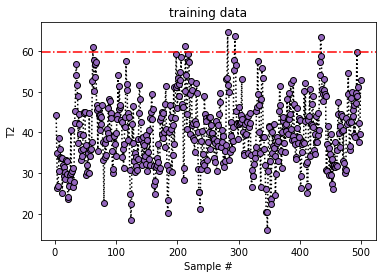

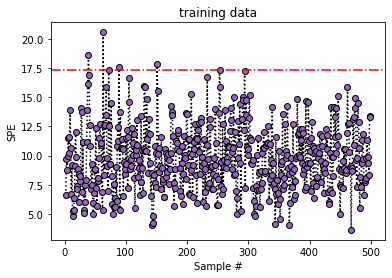

In [7]:
# use methods of the fitted PDS_CVA object to compute monitoring metrics, their thresholds, and plot monitoring charts
T2_train, SPE_train = dpca.computeMetrics(Data_training_scaled, isTrainingData=True)
T2_CL, SPE_CL = dpca.computeThresholds(method='percentile', percentile=99)
dpca.draw_monitoring_charts(title='training data')

# the above three lines of code could equivalently be replaced with the following
# dpca.fit_4_monitoring(Data_training_scaled, autoFindNLatents=True, method='percentile', percentile=99)

In [8]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                     control charts for test data
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

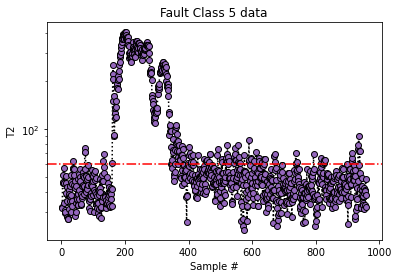

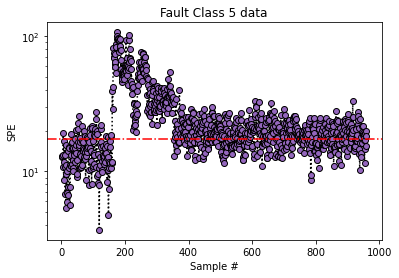

In [9]:
metrics_test = dpca.computeMetrics(Data_faulty_scaled)
dpca.draw_monitoring_charts(metrics=metrics_test, logScaleY=True, title='Fault Class 5 data')

Number of abnormal sample(s):  661


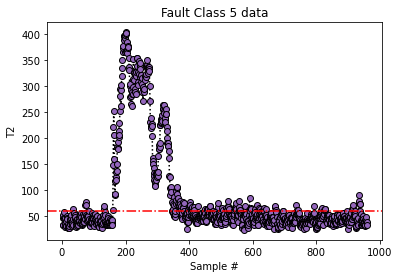

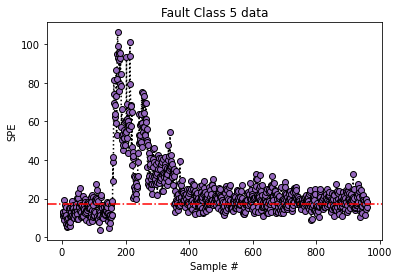

In [10]:
abnormalityFlags = dpca.detect_abnormalities(Data_faulty_scaled, title='Fault Class 5 data')